<a href="https://colab.research.google.com/github/ashishpatel26/Ganpat-University-Data-Science/blob/main/Lecture_8_Kmean_SecondEdition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Ganpat-University-Data-Science/main/data/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
X = data.iloc[:, [3,4]]

In [8]:
X.values

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


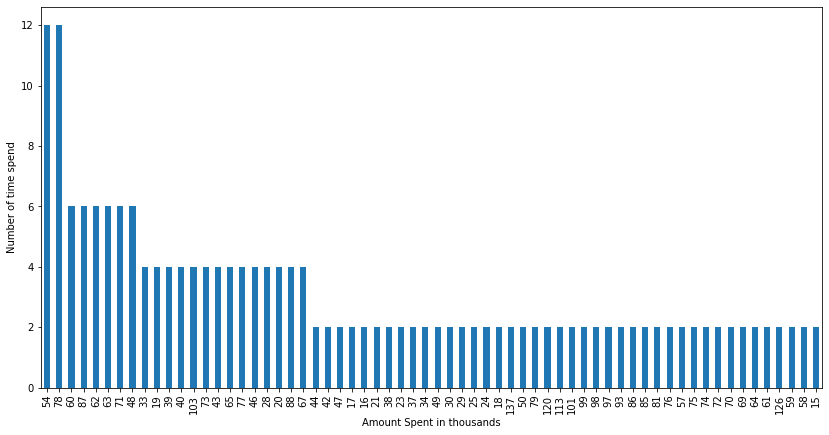

In [12]:
X["Annual Income (k$)"].value_counts().plot(kind="bar", figsize=(14,7), xlabel="Amount Spent in thousands", ylabel="Number of time spend")
plt.show()

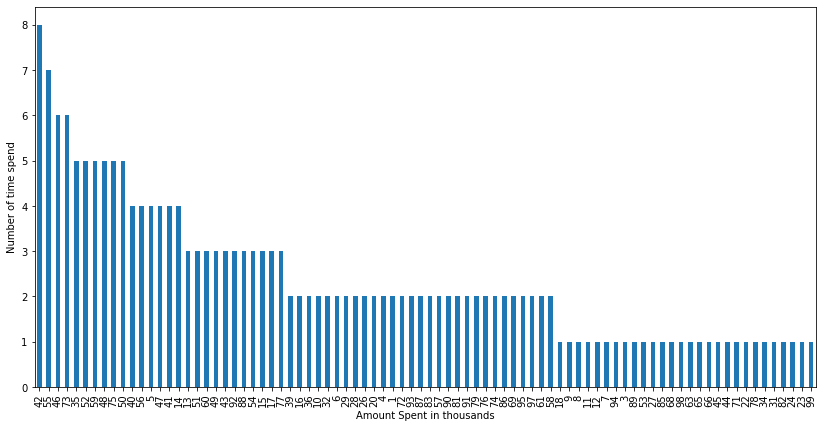

In [13]:
X["Spending Score (1-100)"].value_counts().plot(kind="bar", figsize=(14,7), xlabel="Amount Spent in thousands", ylabel="Number of time spend")
plt.show()

In [14]:
from sklearn.cluster import KMeans

In [46]:
# X = X.values
C_inertia = []
Davies = []
silhauett = []
for i in tqdm(range(2,11)):
  kmean = KMeans(n_clusters=i, random_state=42)
  kmean.fit(X) # training
  C_inertia.append(kmean.inertia_)
  Y_Kmeans = kmean.fit_predict(X)
  print(f"------K value is: {i}------")
  print(f"Inertia : {kmean.inertia_}")
  # print(f"Davies Score : {davies_bouldin_score(X, Y_Kmeans)}")
  Davies.append(davies_bouldin_score(X, Y_Kmeans))
  # print(f"Silhouette Score : {silhouette_score(X, Y_Kmeans)}")
  silhauett.append(silhouette_score(X, Y_Kmeans))

result_analysis = pd.DataFrame()
result_analysis["K"] = range(2,11)
result_analysis["Inertia"] = C_inertia
result_analysis["D_Score"] = Davies
result_analysis["S_score"] = silhauett
result_analysis

------K value is: 2------
Inertia : 181363.59595959596
------K value is: 3------
Inertia : 106348.37306211118
------K value is: 4------
Inertia : 73679.78903948834
------K value is: 5------
Inertia : 44448.45544793371
------K value is: 6------
Inertia : 37265.86520484347
------K value is: 7------
Inertia : 30241.34361793659
------K value is: 8------
Inertia : 25336.946861471864
------K value is: 9------
Inertia : 21850.165282585633
------K value is: 10------
Inertia : 19634.55462934998



,K,Inertia,D_Score,S_score
0,2,181363.595960,1.256774,0.296897
1,3,106348.373062,0.715277,0.467614
2,4,73679.789039,0.710364,0.493196
3,5,44448.455448,0.572563,0.553932
4,6,37265.865205,0.658859,0.537968
5,7,30241.343618,0.710833,0.528810
6,8,25336.946861,0.732186,0.459250
7,9,21850.165283,0.756606,0.456508
8,10,19634.554629,0.754907,0.450566


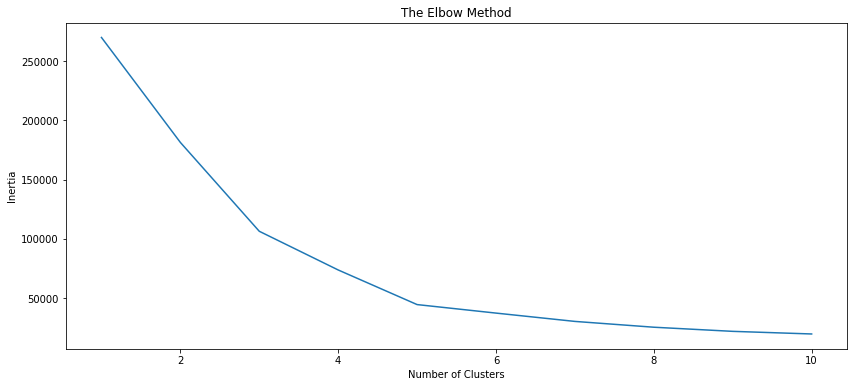

In [29]:
plt.figure(figsize=(14,6))
plt.plot(range(1,11), C_inertia)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [32]:
  kmean = KMeans(n_clusters=5, random_state=42)
  Y_Kmeans = kmean.fit_predict(X) # training

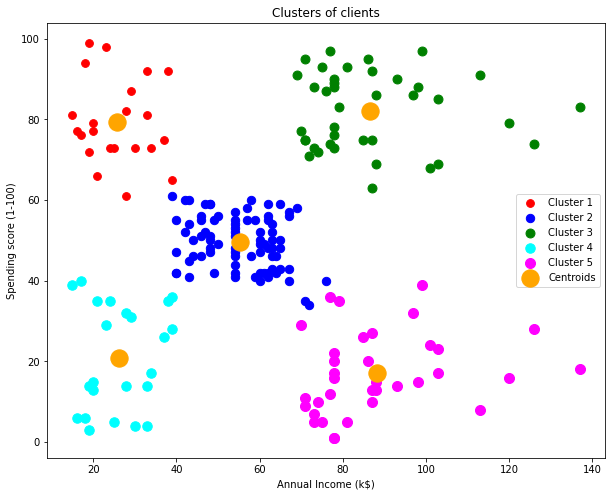

In [36]:
plt.figure(figsize=(10,8))

plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 60, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 70, c='blue', label = 'Cluster 2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 80, c='green', label = 'Cluster 3')

plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 90, c='cyan', label = 'Cluster 4')

plt.scatter(X[Y_Kmeans == 4, 0], X[Y_Kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')

plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s = 300, c = 'orange', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

In [39]:
data["Cluster"] = Y_Kmeans

In [40]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [41]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [42]:
print(f"Davies Score : {davies_bouldin_score(X, Y_Kmeans)}")
print(f"Silhouette Score : {silhouette_score(X, Y_Kmeans)}")

Davies Score : 0.5725628995597082
Silhouette Score : 0.553931997444648
